In [1]:
import pandas as pd

parent_url = 'https://raw.githubusercontent.com/numbers-coffee/blog/master/real_prices/'
currency = pd.read_csv(parent_url + 'currency.csv')
inflation = pd.read_csv(parent_url + 'inflation.csv')
prices = pd.read_csv(parent_url + 'prices.csv') 

In [2]:
from datetime import datetime

date_format = '%Y-%m-%dT%H:%M:%S'
currency['Date'] = currency['DateTime'].apply(lambda x: datetime.strptime(x, date_format))
inflation['Date'] = inflation['DateTime'].apply(lambda x: datetime.strptime(x, date_format))
prices['Date'] = prices['DATE'].apply(lambda x: datetime.strptime(x, '%m/%d/%y'))

In [3]:
from datetime import timedelta

start_date = datetime(1999, 4, 1)
end_date = datetime(2019, 3, 31)
this_date = start_date
date_range = []
while this_date <= end_date:
    date_range.append(this_date)
    this_date += timedelta(1)
    
continuous_dates = pd.DataFrame({'Date': date_range})

In [4]:
df = pd.merge_asof(continuous_dates, currency[['Date', 'Value']], on='Date', direction='nearest')
df = pd.merge_asof(df, inflation[['Date', 'Value']], on='Date', direction='forward')
df = pd.merge_asof(df, prices[['Date', 'CLOSE']], on='Date', direction='backward')

In [5]:
df.set_index('Date', inplace=True)
df.rename(columns={
    'Value_x': 'FX',
    'Value_y': 'Inflation',
    'CLOSE': 'C Market'
}, inplace=True)

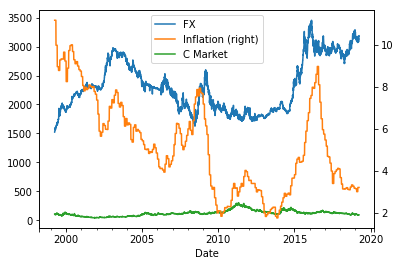

In [6]:
%matplotlib inline
df.plot(kind='line', secondary_y='Inflation')